# Do blocking statistics for everything

In [6]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from vmc.interface import PyHarmonicOscillator, PyImportanceMetropolis,\
    PySimpleGaussian, PySampler

## Step One: A Trip to Monaco
In a sentence: get the local energy arrays

In [62]:
# Natural units
mass = 1.0
omega = 1.0
hbar = 1.0

In [70]:
num_alphas = 11
alphas = np.linspace(0.3, 0.7, num_alphas)
step_length = 0.5
num_particles = 10
num_dimensions = 3
num_parameters = 1

In [71]:
solver = PyImportanceMetropolis(num_particles)
wavefunction = PySimpleGaussian(num_particles, num_dimensions,\
                    mass, omega, spread=step_length)
hamiltonian = PyHarmonicOscillator()
sampler = PySampler(wavefunction, hamiltonian, solver)

In [72]:
number_of_samples = 2**21

In [73]:
# Storage, boooiii (num_alphas) x (num_samples)
energies = np.zeros((num_alphas, number_of_samples))

In [74]:
iteration = 0
for alpha in alphas:
    
    # Monte Carlo cycles
    sampler.sample(number_of_samples, step_length,\
            num_thermalization_steps=number_of_samples*0.15,\
            sample_local_energies=True)
    
    # Get entire local energy array
    energies[iteration, :] = sampler.get_local_energies()
    
    # Redistribute and update
    wavefunction.redistribute()
    iteration += 1

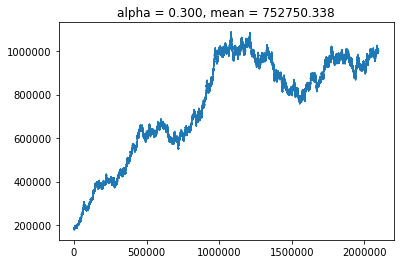

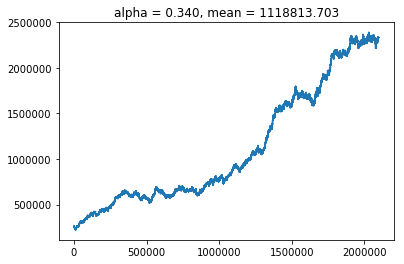

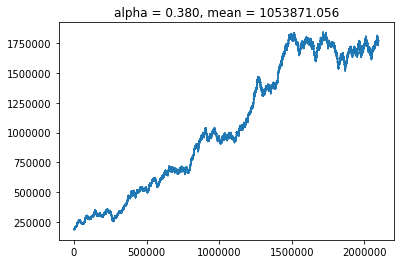

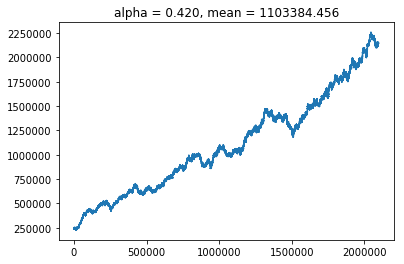

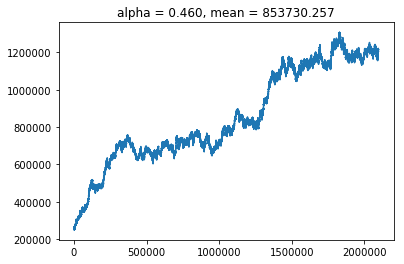

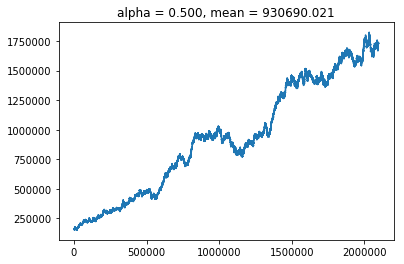

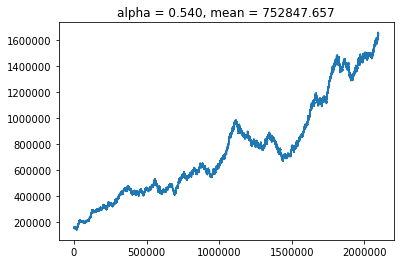

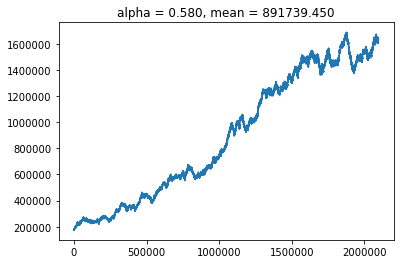

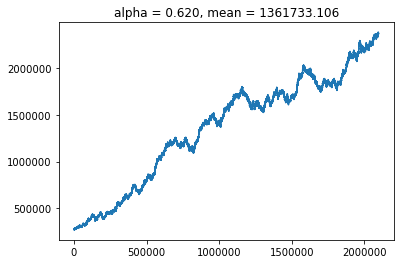

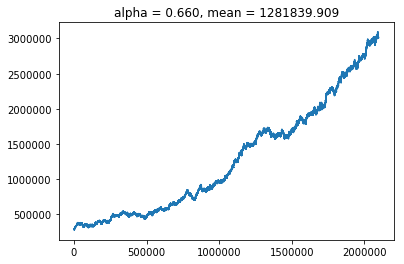

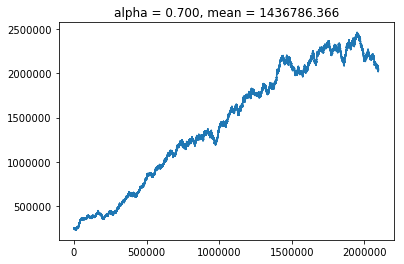

In [75]:
# We like to have fun around here
the_correct_index = int(*np.where((alphas > 0.499) & (alphas < 0.501)))
for i in range(num_alphas):
    plt.figure()
    plt.plot(energies[i, :])
    plt.title("alpha = {:4.3f}, mean = {:5.3f}".format(alphas[i], np.mean(energies[i, :])))
plt.show()

## Step one and a half: Blocking

In [47]:
import sys

In [51]:
sys.path.insert(0, '../vmc_hybrid/scripts/')

In [53]:
import blocking

In [69]:
blocking.block(energies[the_correct_index, :])

Runtime:  0.095428228 seconds
Mean: 64668.98587, Iterations: 16, STD. 11200.04510


125441010.19698055